###**Import Modules**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###**Load Dataset**

In [21]:
df = pd.read_csv('../Dataset/Student Dataset.csv')
df.head(10)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

###**Visualization**

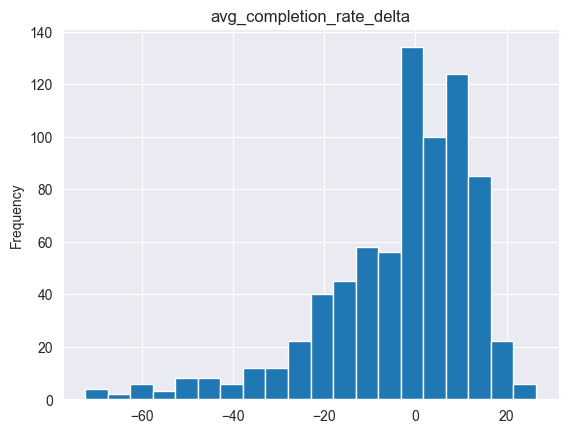

In [22]:
# @title avg_completion_rate_delta

from matplotlib import pyplot as plt
df['avg_completion_rate_delta'].plot(kind='hist', bins=20, title='avg_completion_rate_delta')
plt.gca().spines[['top', 'right',]].set_visible(False)

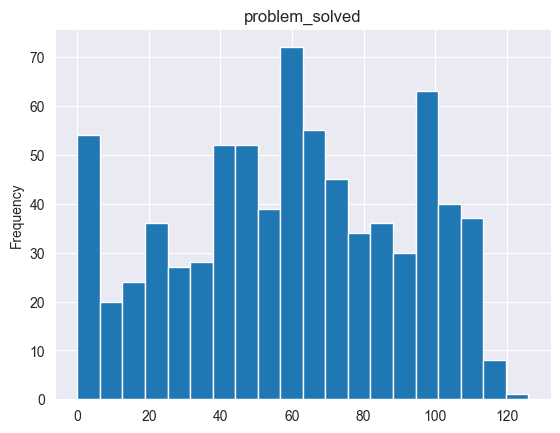

In [23]:
# @title problem_solved

from matplotlib import pyplot as plt
df['problem_solved'].plot(kind='hist', bins=20, title='problem_solved')
plt.gca().spines[['top', 'right',]].set_visible(False)

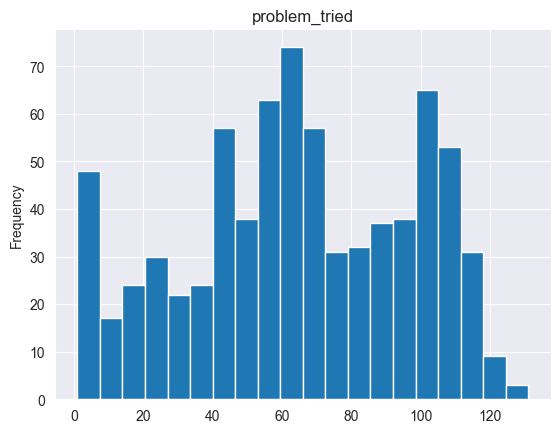

In [24]:
# @title problem_tried

from matplotlib import pyplot as plt
df['problem_tried'].plot(kind='hist', bins=20, title='problem_tried')
plt.gca().spines[['top', 'right',]].set_visible(False)

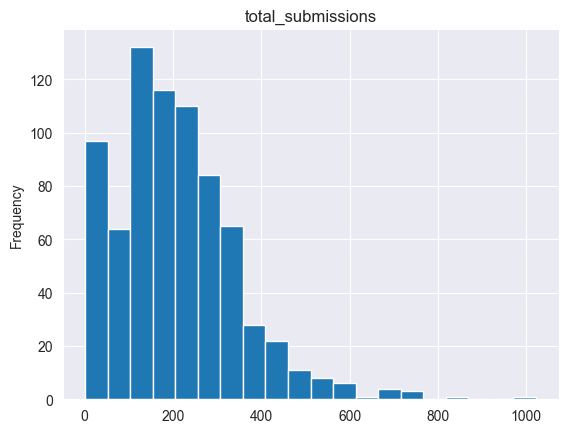

In [25]:
# @title total_submissions

from matplotlib import pyplot as plt
df['total_submissions'].plot(kind='hist', bins=20, title='total_submissions')
plt.gca().spines[['top', 'right',]].set_visible(False)

###**Selecting features and target**

In [26]:
features = ['total_submissions','problem_tried', 'problem_solved', 'avg_completion_rate_delta', 'avg_inverse_solving_rate']
target = ['th','ck']

X = df[features]
y = df[target]

###**Normalize**

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###**Split data, Convert to Tensors**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor (y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

###**Define a LR model (Pytorch)**

In [29]:
model = nn.Linear(X_train_tensor.shape[1], 1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

###**Training**

In [30]:
epochs = 100
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 10/100, Loss: 5.4326
Epoch 20/100, Loss: 4.6753
Epoch 30/100, Loss: 4.6611
Epoch 40/100, Loss: 4.6597
Epoch 50/100, Loss: 4.6594
Epoch 60/100, Loss: 4.6593
Epoch 70/100, Loss: 4.6593
Epoch 80/100, Loss: 4.6592
Epoch 90/100, Loss: 4.6592
Epoch 100/100, Loss: 4.6592


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([602, 2])) that is different to the input size (torch.Size([602, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


###**Evaluate**

In [31]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    mse = loss_fn(predictions, y_test_tensor)
    print(f"Test MSE: {mse.item():.4f}")

Test MSE: 4.5332


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([151, 2])) that is different to the input size (torch.Size([151, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


###**Predict**

In [32]:
input_df = pd.read_csv('../Input - Output/input.csv')

feature_cols = ['total_submissions','problem_tried', 'problem_solved', 'avg_completion_rate_delta', 'avg_inverse_solving_rate']
X_input = input_df[feature_cols]
X_input_scaled = scaler.transform(X_input)
X_input_tensor = torch.tensor(X_input_scaled, dtype=torch.float32)

model.eval()
with torch.no_grad():
    predictions = model(X_input_tensor)

predictions_np = predictions.numpy()  # shape: (N, 4)

input_df['predicted_th','predicted_ck'] = predictions_np
csv_file_path = '../Input - Output/Output.csv'
input_df.to_csv(csv_file_path, index=False)
print("Predicted th and ck result added to output.csv.")

Predictions for th,ck added to output.csv.
